In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Загрузка данных
data = pd.read_csv('data_merged.csv')

In [3]:
# Определение признаков (X) и целевой переменной (y)
X = data[['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B']]
y = data[['Bpair_N', 'Bpair_S', 'Fpair_N', 'Fpair_S']]

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Важность признаков (для каждой целевой переменной)
feature_importances = model.feature_importances_

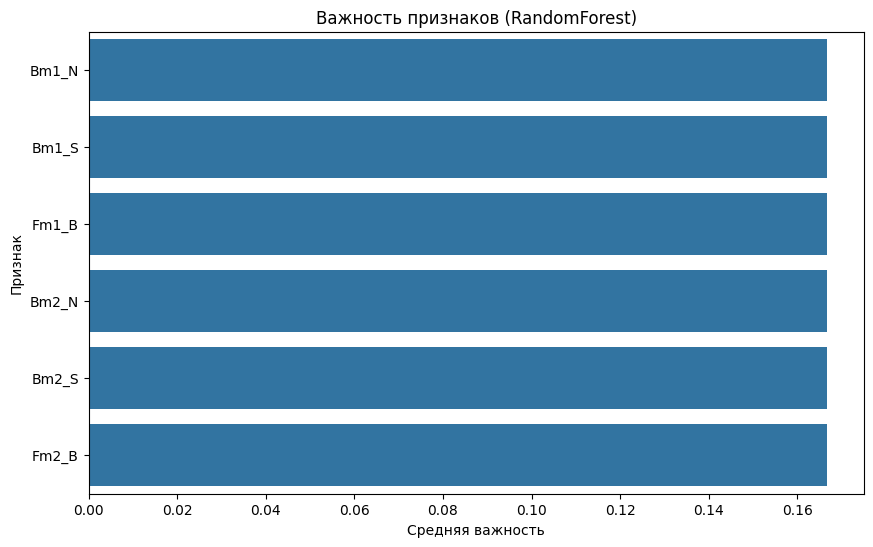

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создание DataFrame с важностью признаков
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances.mean(axis=0)  # Среднее по всем целевым переменным
}).sort_values('Importance', ascending=False)

# График
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df) # , palette='viridis'
plt.title('Важность признаков (RandomForest)')
plt.xlabel('Средняя важность')
plt.ylabel('Признак')
plt.show()

In [5]:
importance_df

,Feature,Importance
0,Bm1_N,0.166667
1,Bm1_S,0.166667
2,Fm1_B,0.166667
3,Bm2_N,0.166667
4,Bm2_S,0.166667
5,Fm2_B,0.166667


In [6]:
for i, target in enumerate(y.columns):
    print(f"Важность признаков для {target}:")
    print(dict(zip(X.columns, model.feature_importances_[i])))

Важность признаков для Bpair_N:


TypeError: 'numpy.float64' object is not iterable